In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
exam_df = pd.read_csv('datasets/exams.csv')
exam_df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
503,male,group C,high school,free/reduced,none,71,66,62
766,female,group A,high school,standard,none,68,76,76
603,female,group C,bachelor's degree,standard,none,70,73,71
185,female,group C,high school,standard,none,35,47,40
576,female,group C,some high school,standard,completed,80,84,85


In [4]:
exam_df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.593000,69.115000,68.091000
std,15.416907,15.144409,15.638455
min,2.000000,1.000000,5.000000
25%,57.000000,59.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


processing.scale is to standardize the values by subtracting the mean and then dividing by the standard deviation

In [5]:
from sklearn import preprocessing
exam_df[['math score']] = preprocessing.scale(exam_df[['math score']].astype('float64'))
exam_df[['reading score']] = preprocessing.scale(exam_df[['reading score']].astype('float64'))
exam_df[['writing score']] = preprocessing.scale(exam_df[['writing score']].astype('float64'))

In [6]:
exam_df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
197,male,group D,some high school,standard,none,0.545583,-0.337917,-0.197753
897,female,group C,high school,standard,none,-0.038484,0.388787,0.442017
121,male,group D,some college,free/reduced,none,-0.038484,-0.866429,-0.453660
304,male,group C,associate's degree,standard,completed,-0.233172,-0.470045,-0.389683
707,female,group D,some high school,free/reduced,completed,-0.752343,0.520915,0.633947


In [7]:
exam_df.describe()

,math score,reading score,writing score
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.309264e-16,3.286260e-16,3.872458e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.191847e+00,-4.499950e+00,-4.036369e+00
25%,-6.225503e-01,-6.682374e-01,-6.455912e-01
50%,2.641280e-02,5.846665e-02,5.815503e-02
75%,6.753759e-01,7.191067e-01,6.979243e-01
max,2.167991e+00,2.040387e+00,2.041440e+00


In [9]:
exam_df['parental level of education'].unique()

array(['some high school', 'some college', "associate's degree",
       'high school', "bachelor's degree", "master's degree"],
      dtype=object)

1. for categorical values with order, the values can be converted to numeric values using LabelEncoder
2. for categorical values with no intrinsicorder, the values can be converted to numeric values using one-hot encoding

In [10]:
parent_level_of_education = [
    'some high school',
    'high school',
    'some college',
    "associate's degree",
    "bachelor's degree", 
    "master's degree"
]

In [11]:
label_encoder = preprocessing.LabelEncoder()
label_encoding = label_encoder.fit(parent_level_of_education)

In [12]:
label_encoding

LabelEncoder()

In [13]:
exam_df['parental level of education'] = label_encoding.transform(exam_df['parental level of education'].astype(str))

In [14]:
exam_df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
98,female,group C,5,standard,completed,0.415791,0.653043,0.761901
259,female,group C,4,free/reduced,completed,-1.076824,-0.668237,0.058155
922,female,group D,0,standard,none,0.026413,-0.007597,0.058155
494,female,group D,5,standard,none,-0.362965,0.058467,0.186109
679,female,group E,5,free/reduced,completed,0.026413,0.454851,0.761901


In [15]:
label_encoding.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype='<U18')

In [16]:
exam_df = pd.get_dummies(exam_df, columns=['race/ethnicity'])
exam_df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,male,5,standard,none,0.934961,0.388787,-0.005822,0,0,1,0,0
1,female,4,free/reduced,none,-1.920476,-0.800365,-0.901499,0,0,1,0,0
2,male,0,free/reduced,none,-0.687447,-2.055582,-2.053084,0,1,0,0,0
3,female,5,standard,none,0.545583,-0.073661,-0.005822,0,0,0,1,0
4,female,0,free/reduced,none,-0.557654,-0.073661,0.314063,0,0,0,1,0


In [17]:
exam_df = pd.get_dummies(exam_df, columns=['gender', 'lunch', 'test preparation course'])

In [18]:
exam_df.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,5,0.934961,0.388787,-0.005822,0,0,1,0,0,0,1,0,1,0,1
1,4,-1.920476,-0.800365,-0.901499,0,0,1,0,0,1,0,1,0,0,1
2,0,-0.687447,-2.055582,-2.053084,0,1,0,0,0,0,1,1,0,0,1
3,5,0.545583,-0.073661,-0.005822,0,0,0,1,0,1,0,0,1,0,1
4,0,-0.557654,-0.073661,0.314063,0,0,0,1,0,1,0,1,0,0,1


In [19]:
from sklearn.model_selection import train_test_split

X = exam_df.drop('math score', axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
x_train.shape, x_test.shape

((800, 14), (200, 14))

In [22]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)

In [23]:
print('Training_score: ', linear_model.score(x_train, y_train))

Training_score:  0.8814723133755272


In [24]:
y_pred = linear_model.predict(x_test)

In [25]:
from sklearn.metrics import r2_score
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.8500162651645489


In [26]:
linear_model = LinearRegression(fit_intercept=False).fit(x_train, y_train)

In [27]:
print('Training_score: ', linear_model.score(x_train, y_train))

Training_score:  0.8814723133755272


In [28]:
y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.8500162651645492


In [29]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
433,1.318181,1.324339
760,0.460926,1.324339
430,0.242046,0.350894
503,-0.066460,0.285998
714,0.828276,1.129650
111,-0.199591,0.285998
478,-0.563104,-0.752343
902,1.750316,2.167991
237,-0.753193,-0.622550
508,-0.677471,-0.622550


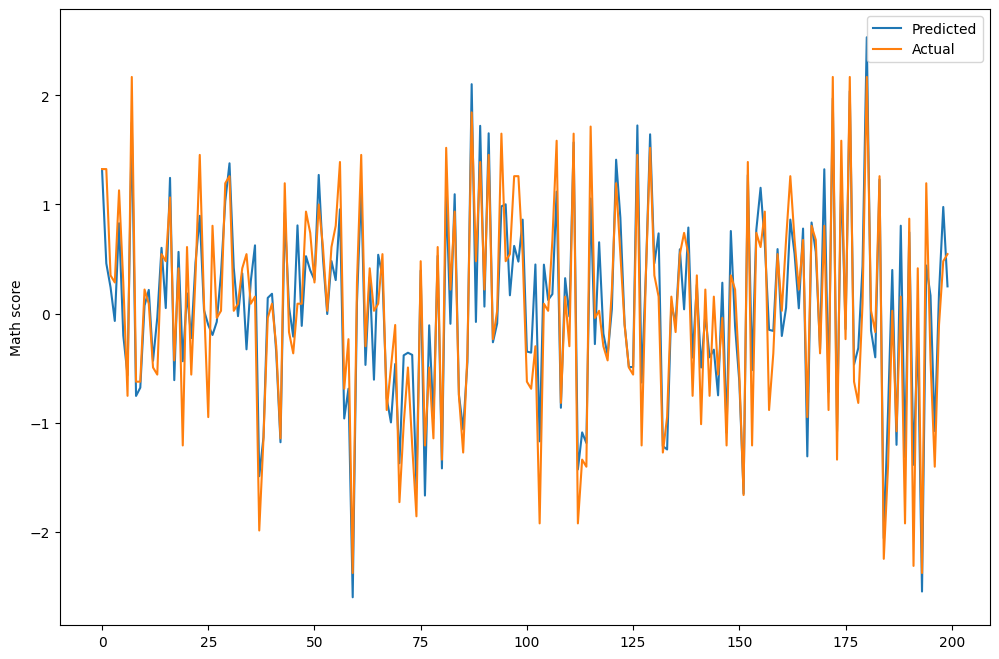

In [30]:
plt.figure(figsize=(12,8))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Math score')
plt.legend()
plt.show()

In [32]:
X = exam_df.drop(['math score', 'writing score', 'reading score'], axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print('Training_score: ', linear_model.score(x_train, y_train))
y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

Training_score:  0.26730497408840137
Testing score:  0.2540734275971205
